# Trabajo Práctico 1

# Ejercicio 1 

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1) a) Representación gráfica de las redes

Importamos los datos y creamos los grafos G1 para las interacciones binarias (yeast_Y2H.txt), G2 obtenida de la literatura (yeast_LIT.txt) y G3 para la red de copertenencia a complejos proteicos (yeast_AP-MS.txt), obtenidas del Yeast Interactome Database.

In [4]:
G1=nx.read_edgelist('yeast_Y2H.txt')   # Interacciones binarias
G2=nx.read_edgelist('yeast_LIT.txt')   # De literatura
G3=nx.read_edgelist('yeast_AP-MS.txt') # Copertenencia a complejos protéicos


La representación gráfica de las redes se encuentra en las siguientes figuras:

   ## Representación Yeast Y2H

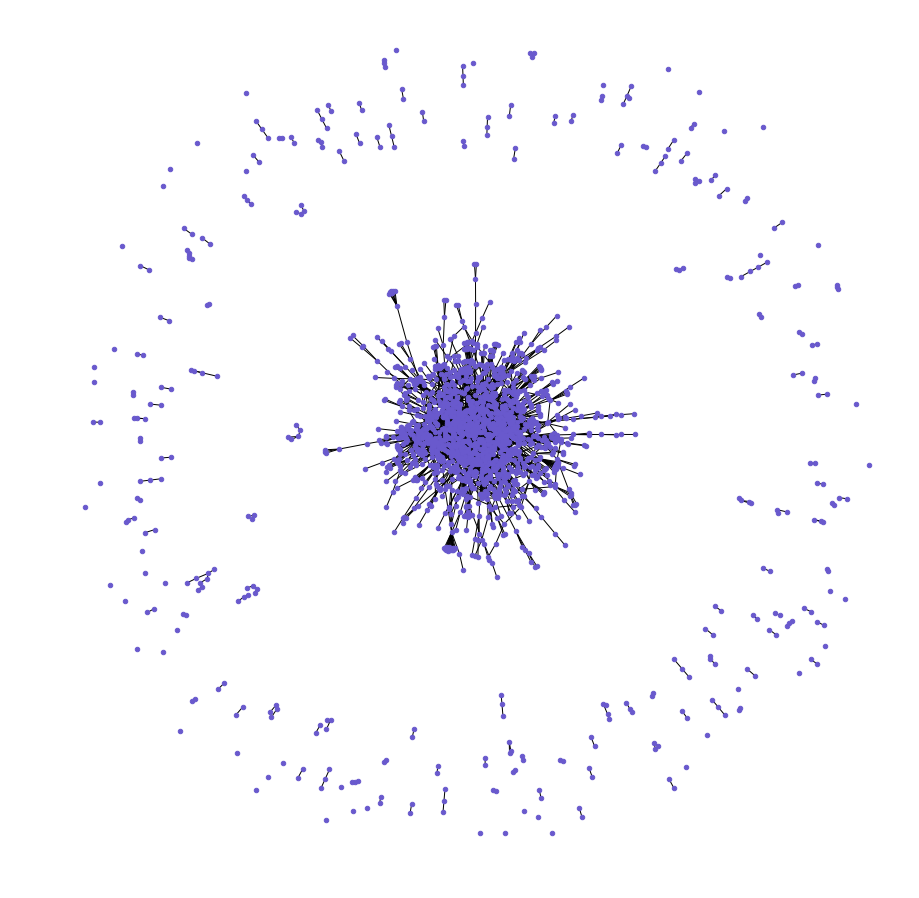

In [18]:
plt.figure(1,figsize=(12,12)) 
nx.draw(G1,pos=nx.spring_layout(G1), with_labels=False,node_size=20,node_color='#6959CD', width=1)
plt.show()

   ## Representación Yeast Literatura

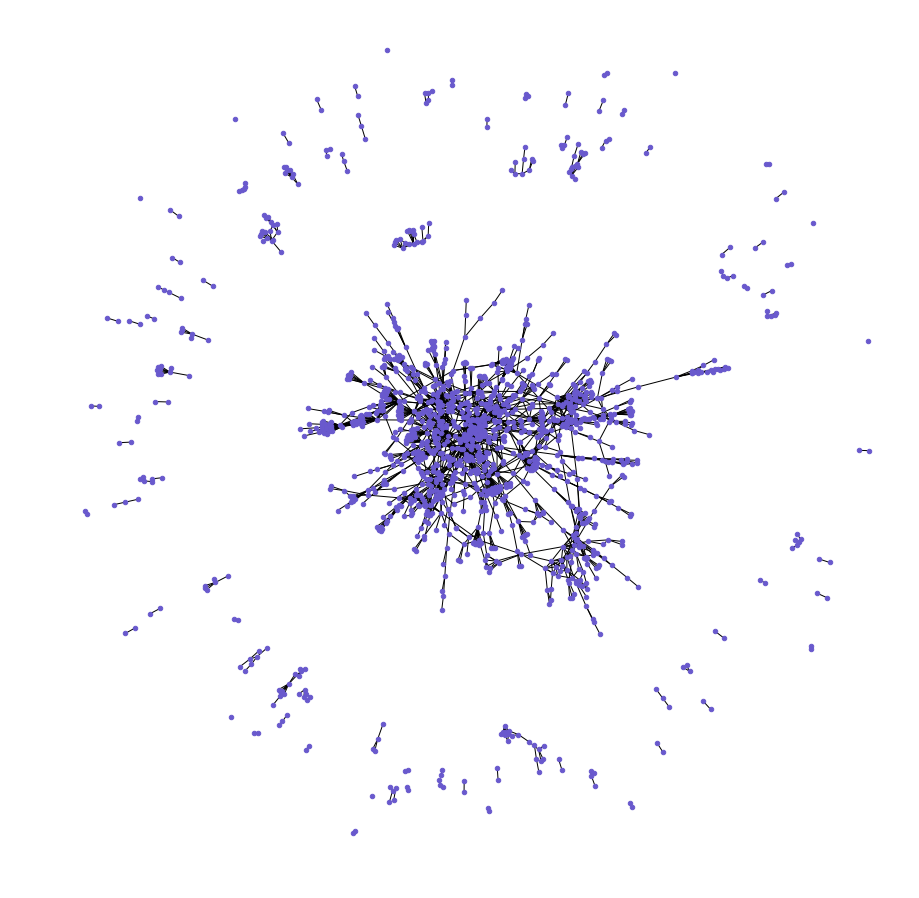

In [19]:
plt.figure(2,figsize=(12,12)) 
nx.draw(G2,pos=nx.spring_layout(G2), with_labels=False,node_size=20,node_color='#6959CD', width=1)
plt.show()

   ## Representación Yeast AP/MS

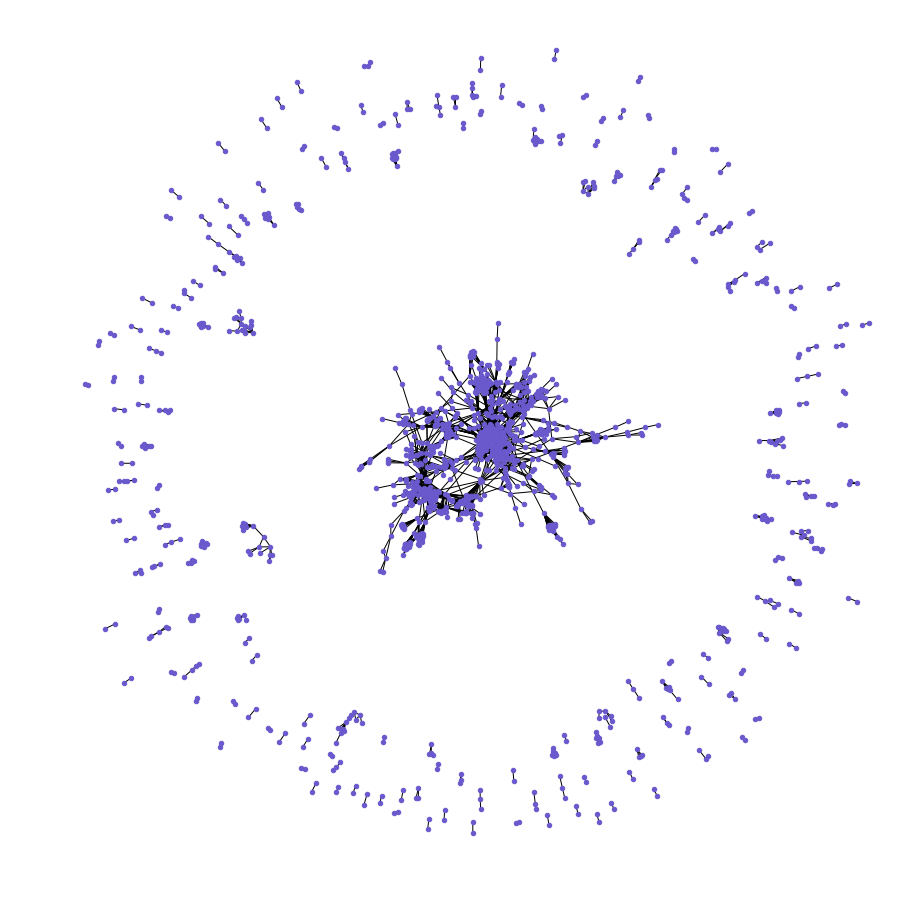

In [20]:
plt.figure(3,figsize=(12,12)) 
nx.draw(G3,pos=nx.spring_layout(G3), with_labels=False,node_size=20,node_color='#6959CD', width=1)
plt.show()

b) Creamos una tabla con las propiedades principales de las tres redes.

 ### Número total de nodos 

In [13]:
nodos=[G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]
print '  Y2H  Lit   AP/MS'
nodos

  Y2H  Lit   AP/MS


[2018, 1536, 1622]

### Número de enlaces

In [16]:
enlaces=[G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]
print ' Y2H   Lit   AP/MS'
enlaces

 Y2H   Lit   AP/MS


[2930, 2925, 9070]

### Dirigibilidad

Dos proteinas están conectadas si hay evidencia experimental de que pueden interactuar entre sí en la célula. Por su naturaleza se espera que un interactoma sea un grafo no dirigido; esto lo pudimos observar en los archivos de datos, pues no hay enlace alguno del tipo (A,B) y (B,A) simultáneamente, y además evaluando la dirigibilidad según:

In [19]:
dirigibilidad= [nx.is_directed(G1),nx.is_directed(G2),nx.is_directed(G3)]
print '  Y2H    Lit   AP/MS'
dirigibilidad

  Y2H    Lit   AP/MS


[False, False, False]

### Grado medio

In [21]:
grado_medio = np.round(np.true_divide(enlaces,nodos),2)
grado_medio=grado_medio.tolist()    # Lo pasamos a formato lista porque venimos trabajando en ese formato. 
print '  Y2H  Lit  AP/MS'
grado_medio

  Y2H  Lit  AP/MS


[1.45, 1.9, 5.59]

### Grado máximo y grado mínimo de las redes

In [24]:
## Creamos una función que calcula el grado maximo para una dada red. 
def grado_max(red):
    cantidad_nodos = red.number_of_nodes()
    maximo = 0
    i=0
    while i<cantidad_nodos:
        if list(red.degree)[i][1]>maximo:
            maximo = list(red.degree)[i][1]
        i+=1
    return maximo

grado_maximo = [grado_max(G1),grado_max(G2),grado_max(G3)]
print 'Y2H  Lit AP/MS'
grado_maximo

Y2H  Lit AP/MS


[91, 40, 127]

In [26]:
## Creamos funcion que determina el grado minimo para una dada red. 
def grado_min(red):
    cantidad_nodos = red.number_of_nodes()
    minimo = list(red.degree)[0][1]
    i=0
    while i<cantidad_nodos:
        if list(red.degree)[i][1]<minimo:
            minimo = list(red.degree)[i][1]
        i+=1
    return minimo

grado_minimo = [grado_min(G1),grado_min(G2),grado_min(G3)]
print 'Y2H Lit AP/MS'
grado_minimo

Y2H Lit AP/MS


[1, 1, 1]

### Densidad de la red

In [30]:
## La siguiente función permite calcular la densidad de una dada red (no dirigida)
def calcula_densidad(red):
    edges = float(red.number_of_edges())
    nodos = float(red.number_of_nodes())
    densidad = edges / (nodos*(nodos-1))
    return round(densidad,5)
densidad = [calcula_densidad(G1),calcula_densidad(G2),calcula_densidad(G3)]
print '   Y2H      Lit      AP/MS'
densidad

   Y2H      Lit      AP/MS


[0.00072, 0.00124, 0.00345]

### Coeficiente de clustering global y local

In [32]:
# Coeficientes de clustering global
clustering_global = [round(nx.transitivity(G1),2),round(nx.transitivity(G2),2),round(nx.transitivity(G3),2)]
print '  Y2H   Lit  AP/MS'
clustering_global

  Y2H   Lit  AP/MS


[0.02, 0.35, 0.62]

In [34]:
# Coeficientes de clustering local
clustering_local = [round(nx.average_clustering(G1),2),round(nx.average_clustering(G2),2),round(nx.average_clustering(G3),2)]
print '  Y2H   Lit  AP/MS'
clustering_local

  Y2H   Lit  AP/MS


[0.05, 0.29, 0.55]

### Diámetro de cada red

In [36]:
componente_gigante = [max(nx.connected_components(G1), key=len),max(nx.connected_components(G2), key=len),max(nx.connected_components(G3), key=len)]
grafo_componente_gigante = [G1.subgraph(componente_gigante[0]),G2.subgraph(componente_gigante[1]),G3.subgraph(componente_gigante[2])]
diametro = [nx.diameter(grafo_componente_gigante[0]),nx.diameter(grafo_componente_gigante[1]),nx.diameter(grafo_componente_gigante[2])]
print 'Y2H Lit AP/MS'
diametro

Y2H Lit AP/MS


[14, 19, 15]

## Tabla de resultados 

La siguiente tabla agrupa todos los resultados del inciso (N, L, dirigibilidad, grado medio, etc.). Cada columna contiene los resultados correspondientes a cada una de las redes analizadas. 

In [32]:
tabla = pd.DataFrame(columns=['Y2H','LIT','AP-MS'], index=['N','L','Dirigibilidad','Grado medio','Grado maximo','Grado minimo','Densidad','Diametro'])
tabla.loc['N'] = pd.Series({'Y2H':nodos[0], 'LIT':nodos[1], 'AP-MS':nodos[2]})
tabla.loc['L'] = pd.Series({'Y2H':enlaces[0], 'LIT':enlaces[1], 'AP-MS':enlaces[2]})
tabla.loc['Dirigibilidad'] = pd.Series({'Y2H':dirigibilidad[0], 'LIT':dirigibilidad[1], 'AP-MS':dirigibilidad[2]})
tabla.loc['Grado medio'] = pd.Series({'Y2H':grado_medio[0], 'LIT':grado_medio[1], 'AP-MS':grado_medio[2]})
tabla.loc['Grado maximo'] = pd.Series({'Y2H':grado_maximo[0], 'LIT':grado_maximo[1], 'AP-MS':grado_maximo[2]})
tabla.loc['Grado minimo'] = pd.Series({'Y2H':grado_minimo[0], 'LIT':grado_minimo[1], 'AP-MS':grado_minimo[2]})
tabla.loc['Densidad'] = pd.Series({'Y2H':densidad[0], 'LIT':densidad[1], 'AP-MS':densidad[2]})
tabla.loc['C global'] = pd.Series({'Y2H':clustering_global[0], 'LIT':clustering_global[1], 'AP-MS':clustering_global[2]})
tabla.loc['C local'] = pd.Series({'Y2H':clustering_local[0], 'LIT':clustering_local[1], 'AP-MS':clustering_local[2]})
tabla.loc['C local'] = pd.Series({'Y2H':clustering_local[0], 'LIT':clustering_local[1], 'AP-MS':clustering_local[2]})
tabla.loc['Diametro'] = pd.Series({'Y2H':diametro[0], 'LIT':diametro[1], 'AP-MS':diametro[2]})
tabla

,Y2H,LIT,AP-MS
N,2018,1536,1622
L,2930,2925,9070
Dirigibilidad,False,False,False
Grado medio,1.45,1.9,5.59
Grado maximo,91,40,127
Grado minimo,1,1,1
Densidad,0.00072,0.00124,0.00345
Diametro,14,19,15
C global,0.02,0.35,0.62
C local,0.05,0.29,0.55


### En reemplazo de ítems c-d de la guía

c) En este inciso se espera que determinemos si los métodos Y2H y AP-MS sobreestiman o subestiman las interacciones. Lo haremos mediante el análisis de las propiedades de las redes obtenidas; en particular nos valemos del coeficiente de clustering local que indica en qué medida pares de vecinos de un nodo tomado al azar a su vez interactuan entre sí. Observamos que el bajo valor del coeficiente para la red obtenida por Y2H respecto del de la red de datos de literatura nos permiten inferir que este método subestima las interacciones o da falsos negativos; el caso contrario ocurre para el método AP-MS que las sobreestima o da falsos positivos. Esto es compatibles con lo observado en [2] y [3].





## Referencias:

[1] Barabási, A.; M. Pósfai (2016). "Network Science". Cambridge University Press.

[2] Yu X, Ivanic J, Wallqvist A, Reifman J (2009). "A Novel Scoring Approach for Protein Co-Purification Data Reveals High Interaction Specificity". PLOS Computational Biology

[3] Brückner, Anna et al. "Yeast Two-Hybrid, a Powerful Tool for Systems Biology". International Journal of Molecular Sciences 10.6 (2009): 2763–2788. PMC. Web. 24 Sept. 2018.